# Predicting Industrial Machine Downtime: Level 2

## 📖 Background
You work for a manufacturer of high-precision metal components used in aerospace, automotives, and medical device applications. Your company operates three different machines on its shop floor that produce different sized components, so minimizing the downtime of these machines is vital for meeting production deadlines.

Your team wants to use a data-driven approach to predicting machine downtime, so proactive maintenance can be planned rather than being reactive to machine failure. To support this, your company has been collecting operational data for over a year and whether each machine was down at those times.

In this second level, you're going to visualize and examine the data in more detail. This level is aimed towards intermediate learners. If you want to challenge yourself a bit more, check out level three!

## 💾 The data

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

#### Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

## 💪 Competition challenge

Create a report that covers the following:
1. Explore correlations between the various operational data in the dataset. 
2. Do you see a pattern in machine downtime over time?
3. Which factors (visually) seem to be connected to machine downtime?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

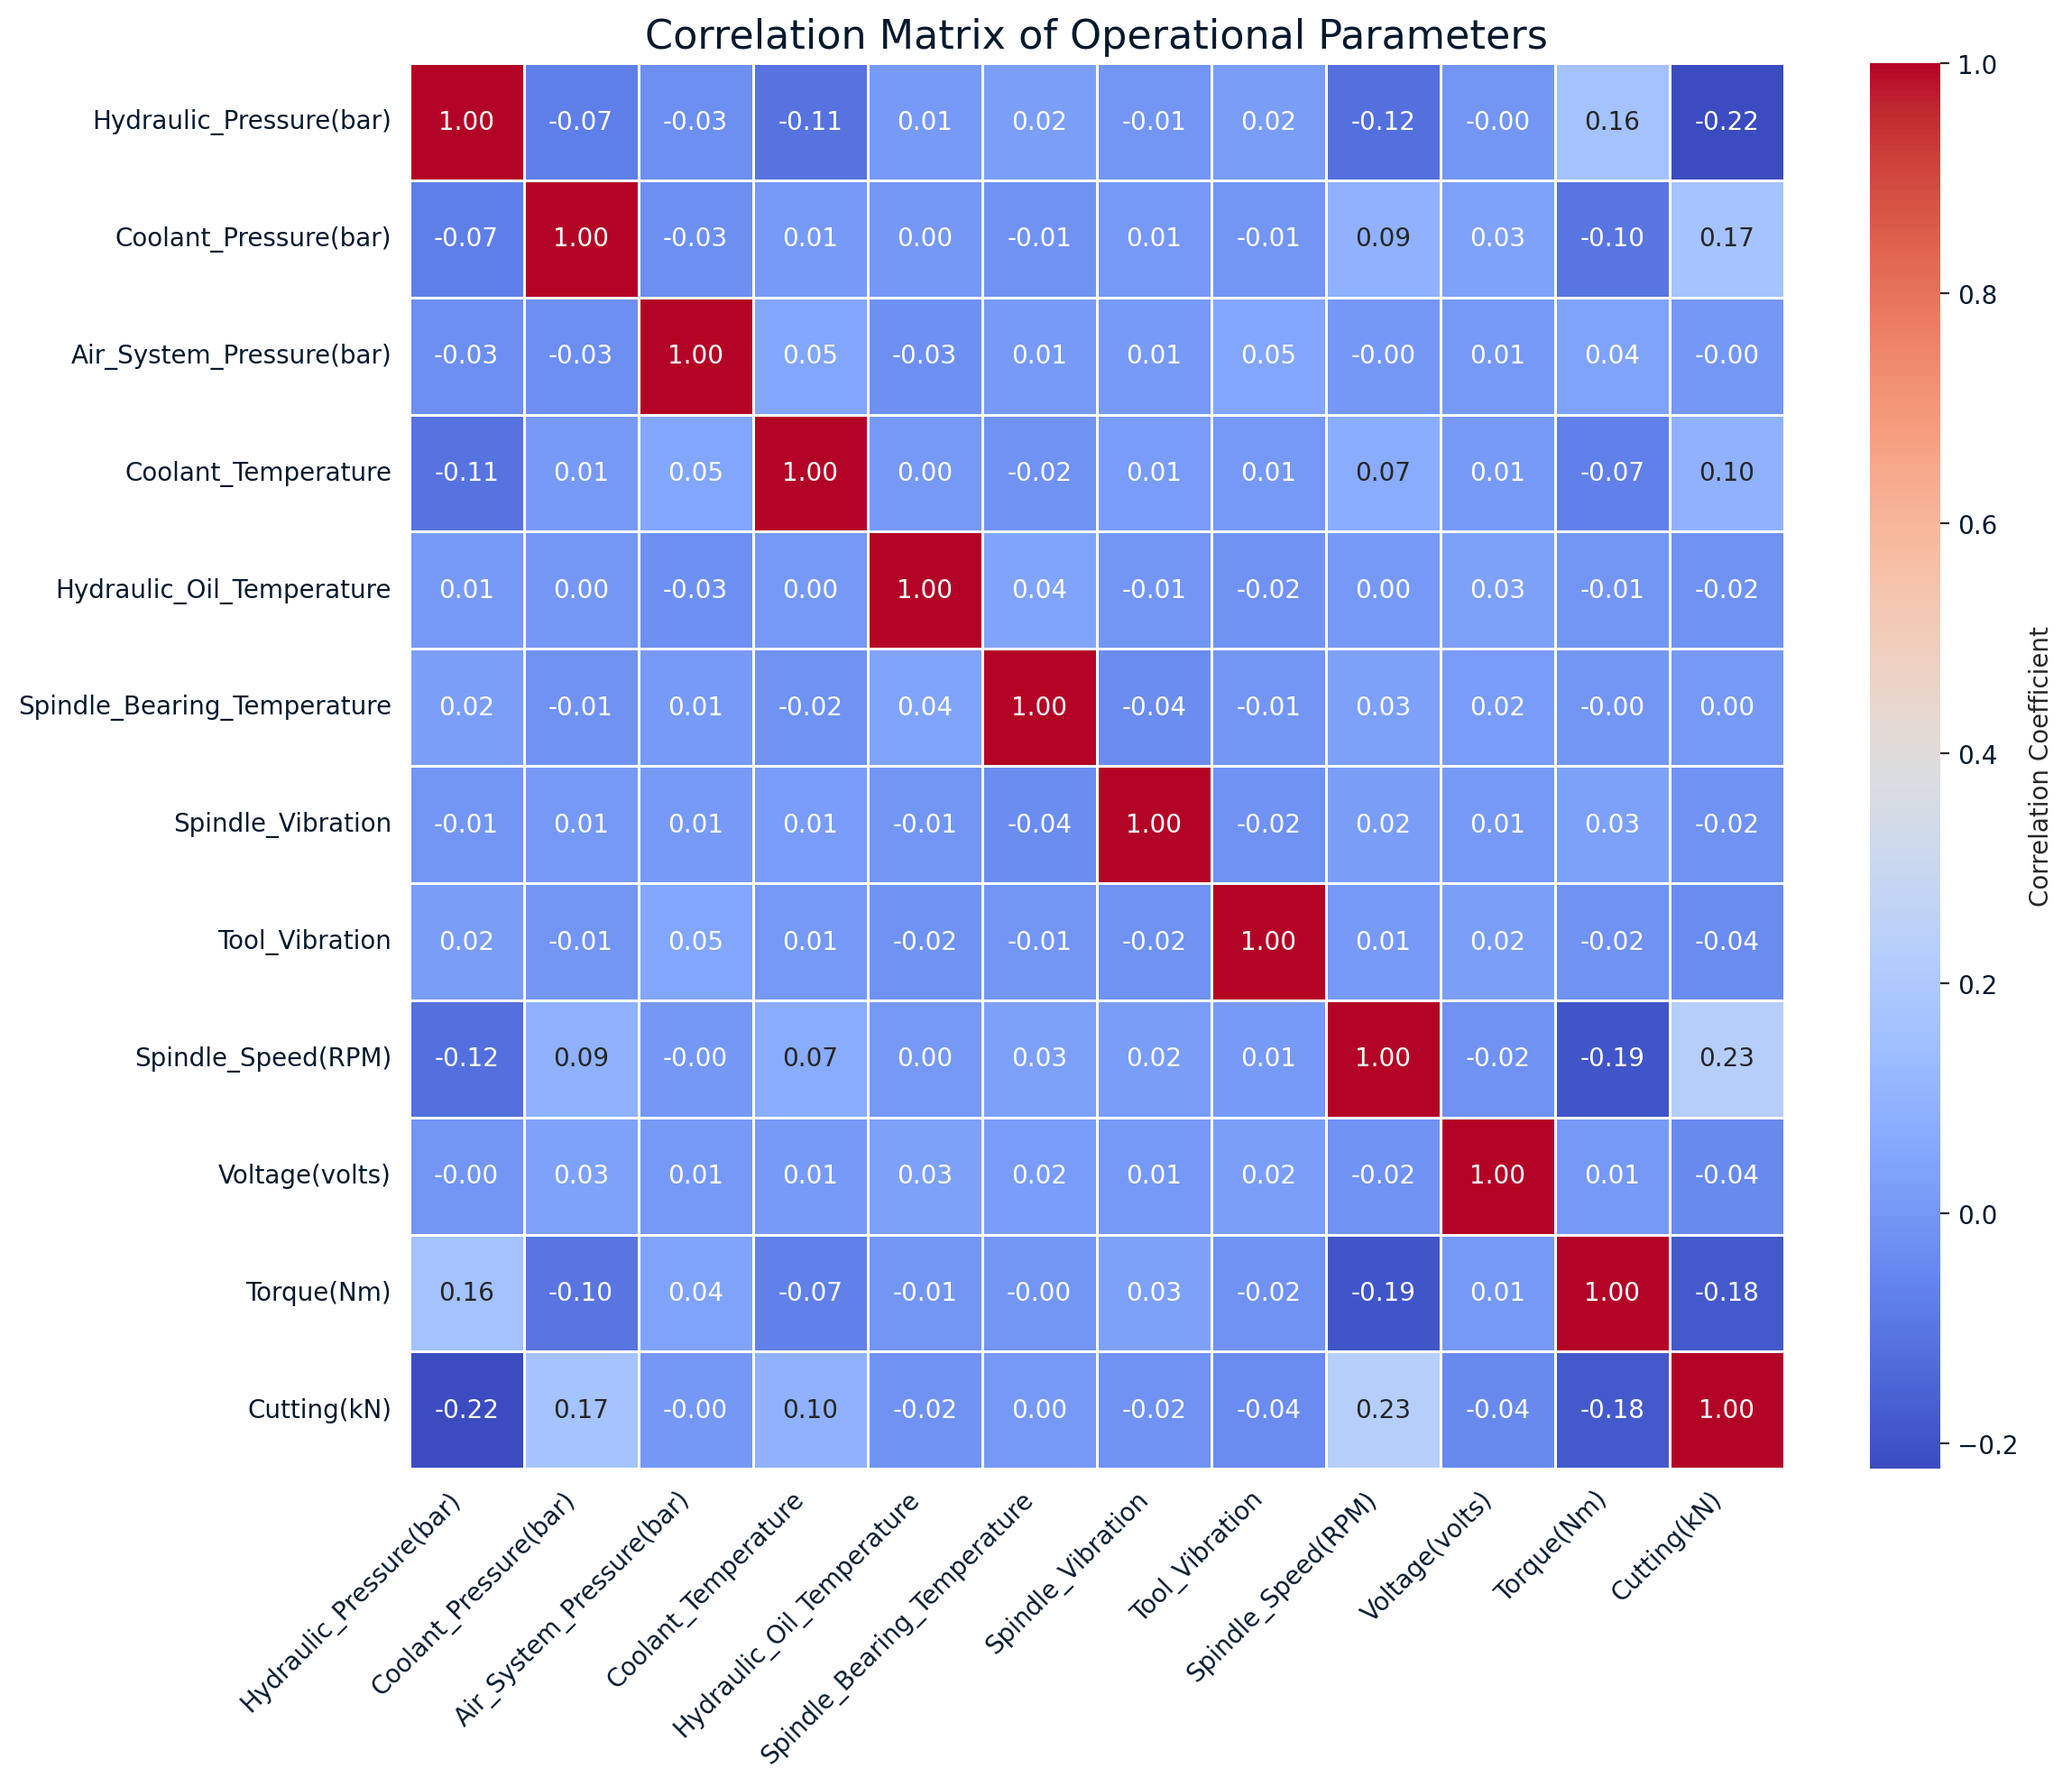

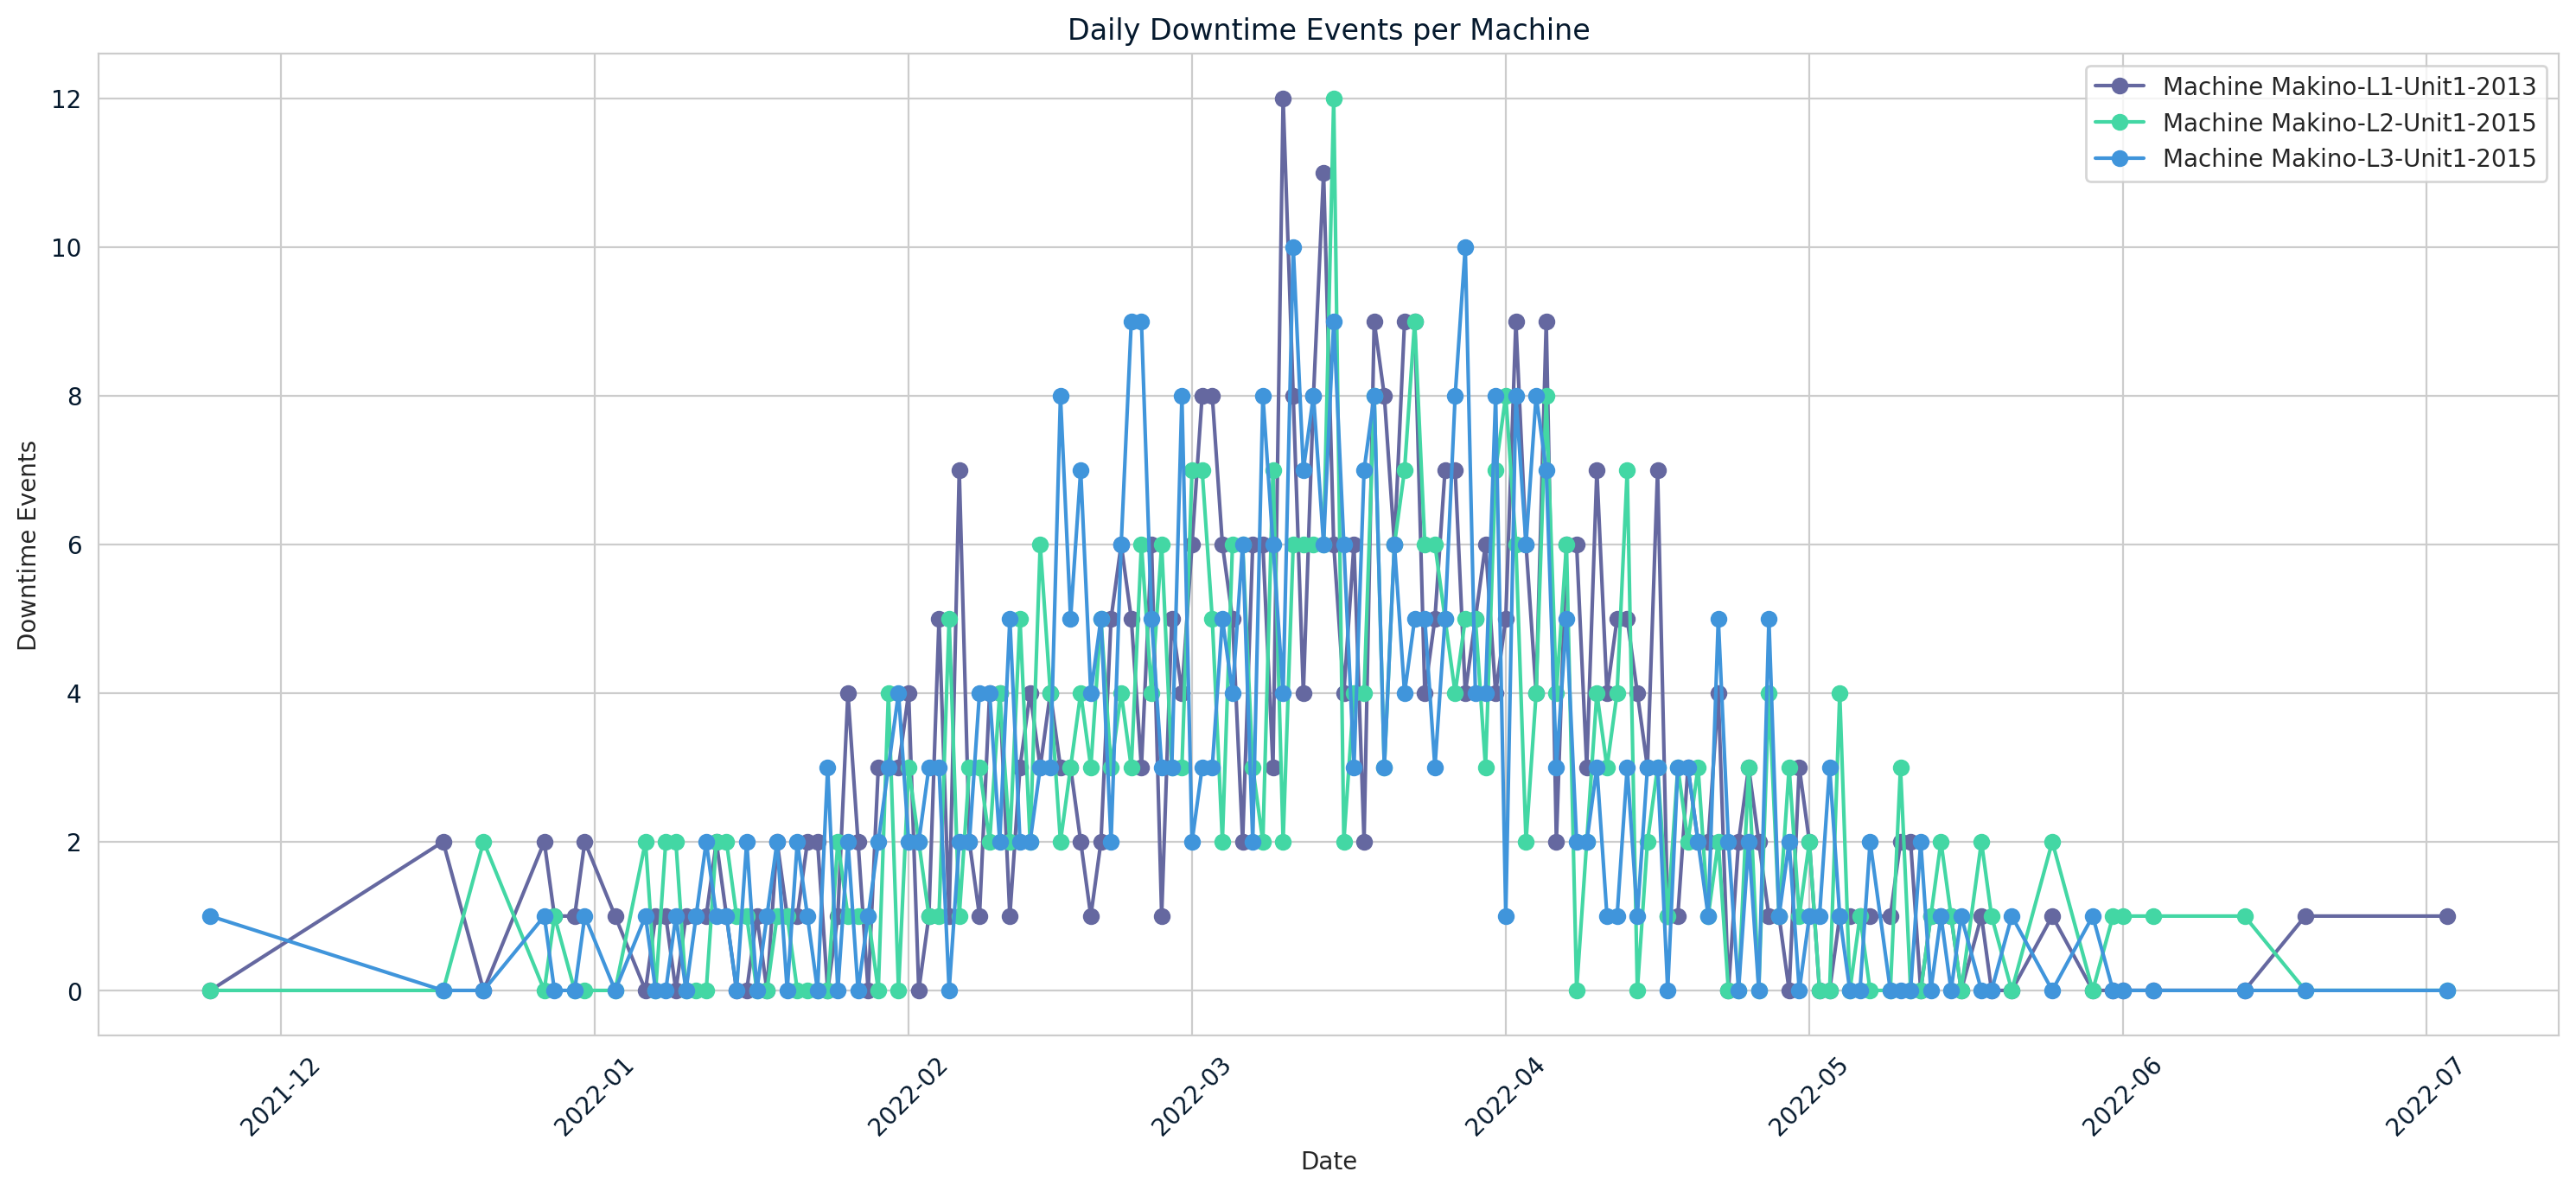

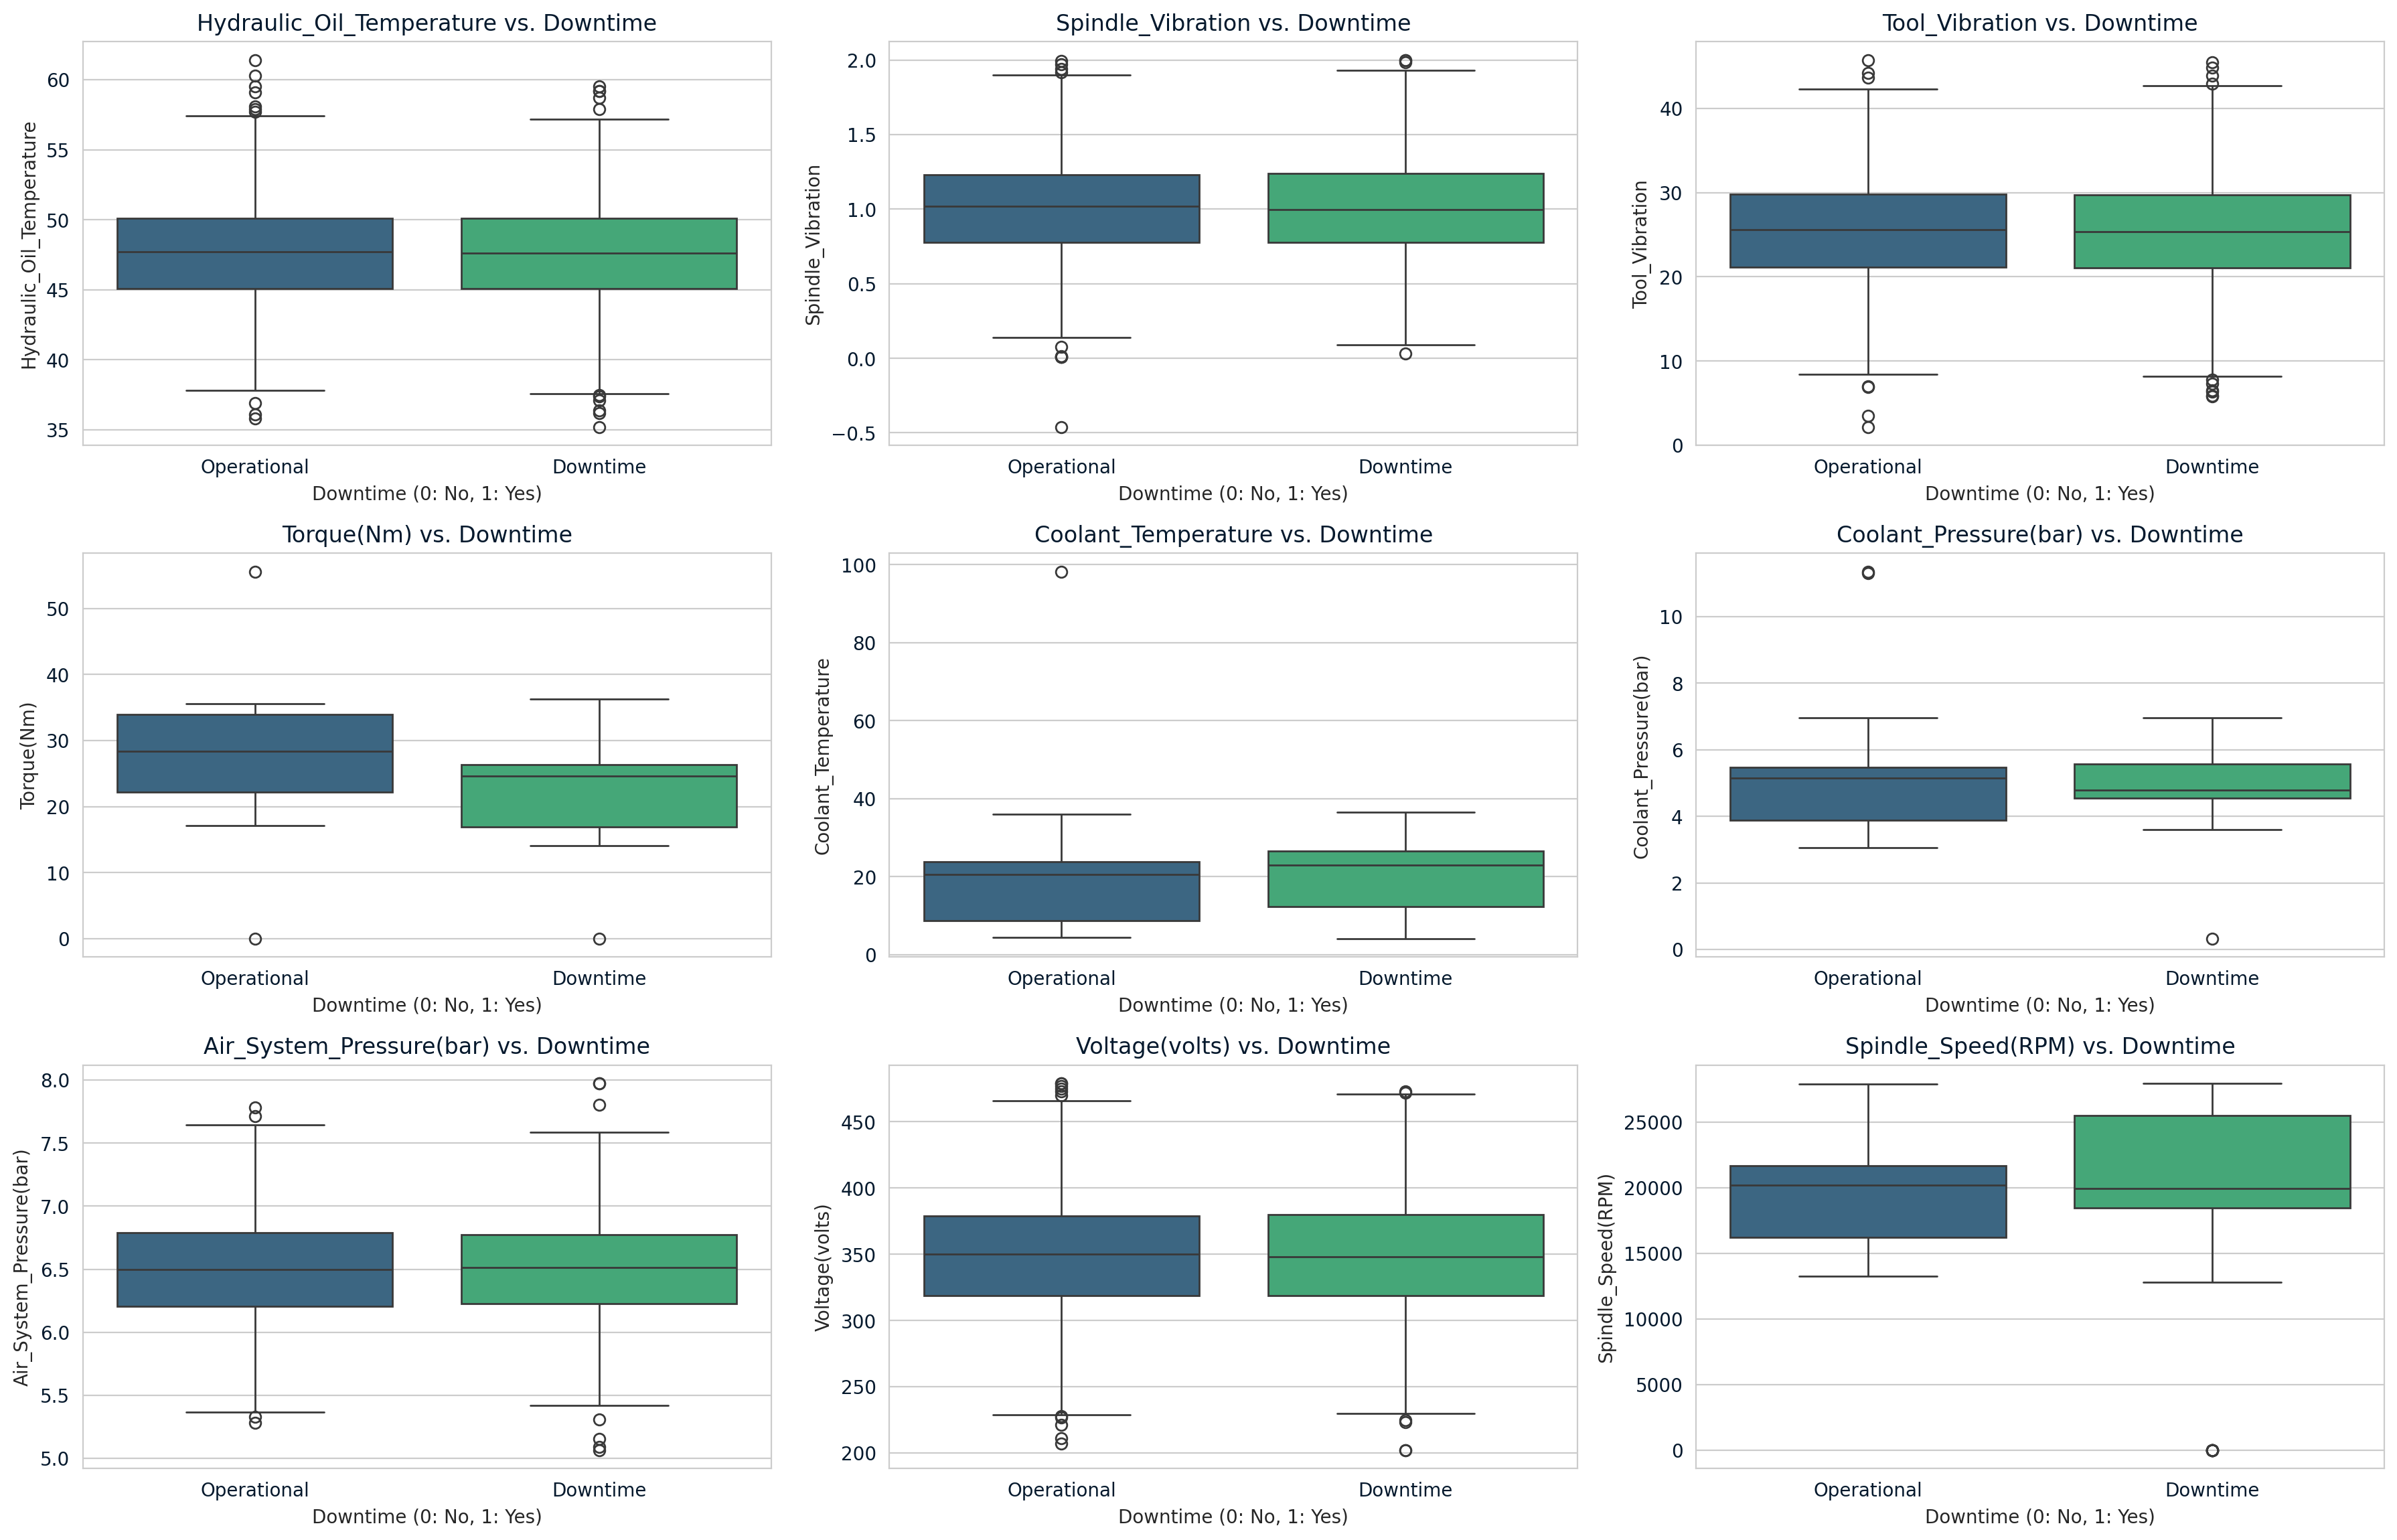

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       247
           1       0.99      1.00      1.00       253

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

--- Confusion Matrix ---
[[245   2]
 [  0 253]]


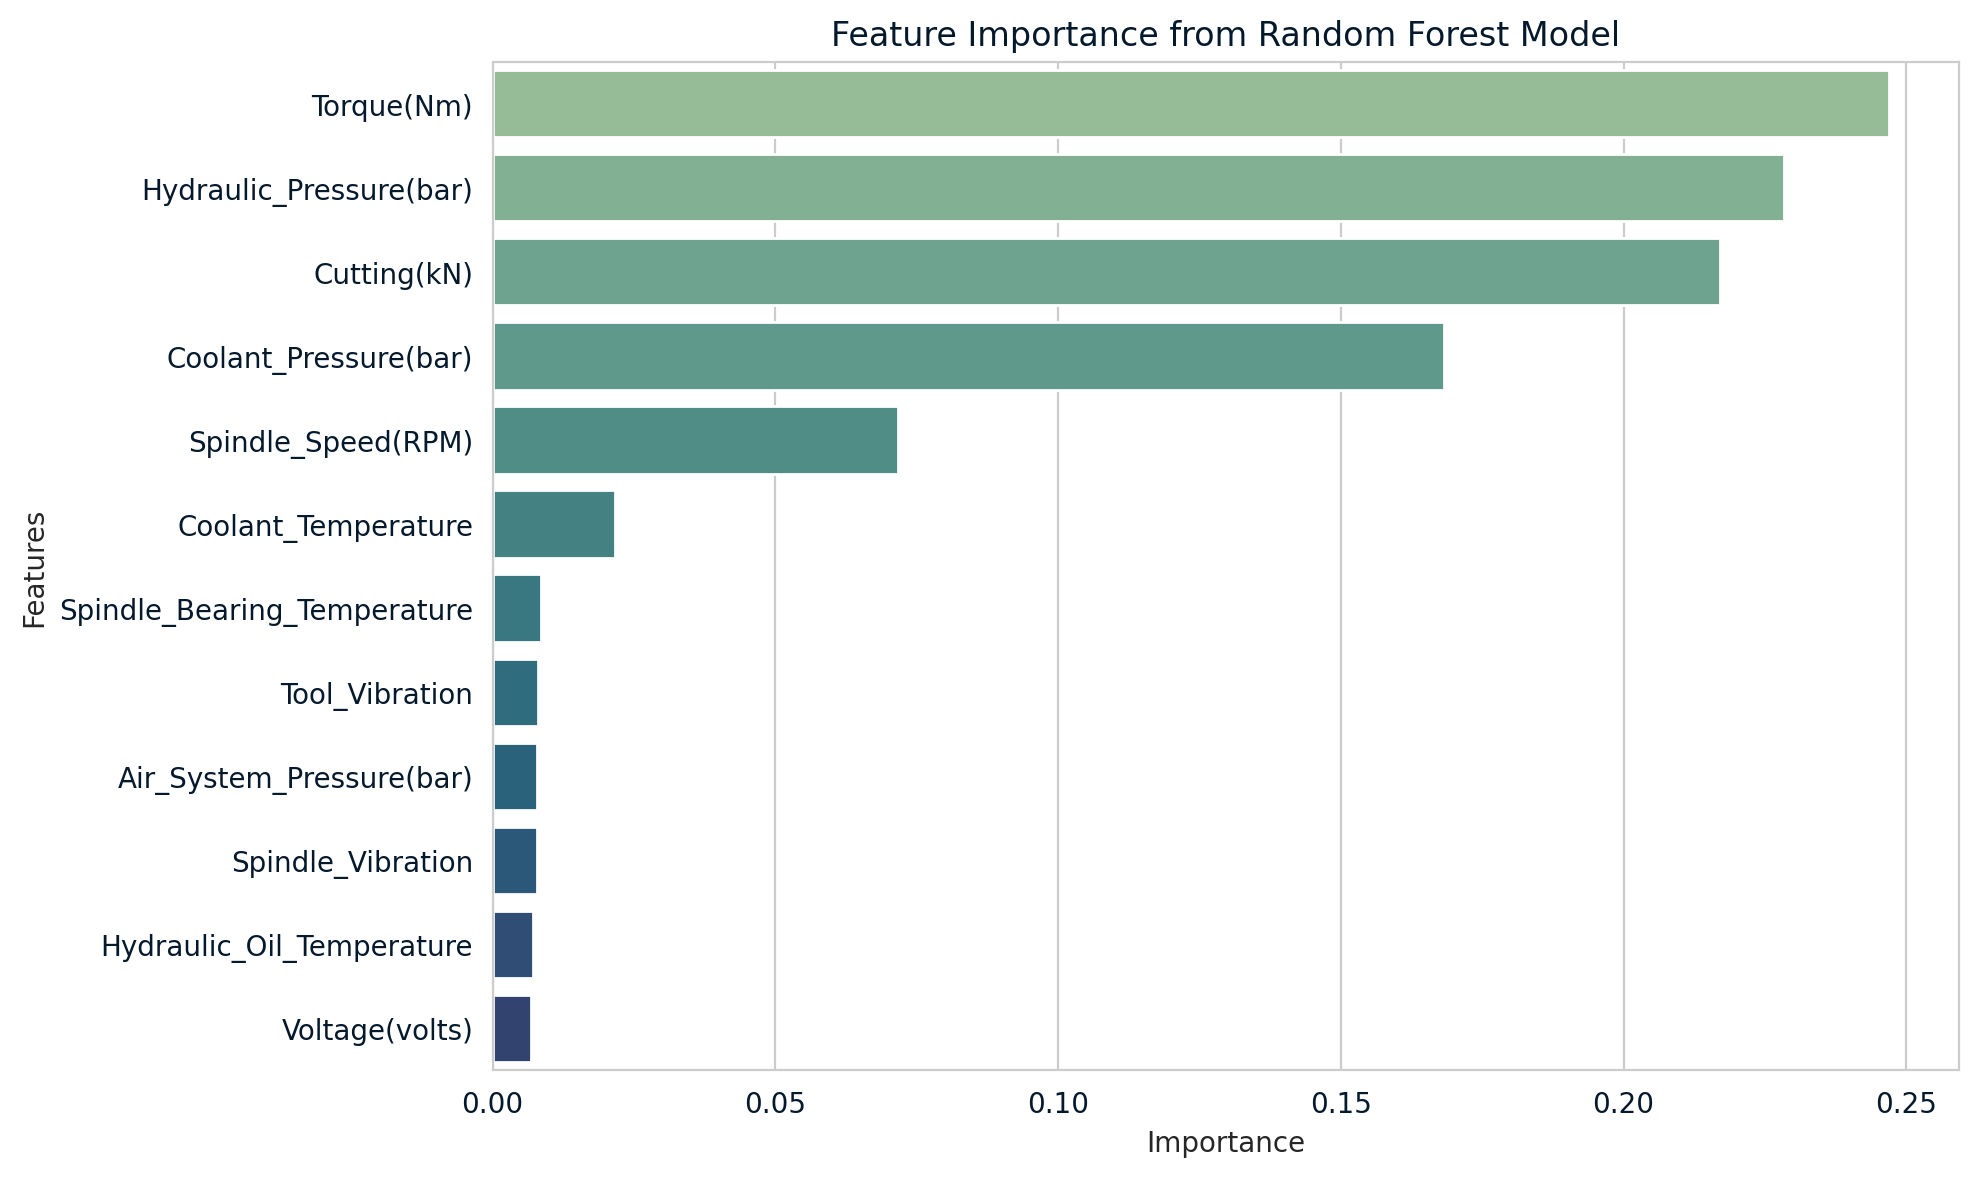


--- Recommendations ---
1. Develop a predictive maintenance system using the trained model.
2. Monitor critical features such as Hydraulic_Oil_Temperature and Vibration levels.
3. Set dynamic thresholds based on historical values and model outputs.
4. Prioritize monitoring and maintenance of Machine 'M-03' due to frequent downtime.
5. Continuously retrain the model using updated sensor data to maintain accuracy.


In [10]:
# Full Machine Downtime Analysis with Predictive Modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Inter']

# --- Load Data ---
df = pd.read_csv('machine_downtime.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Downtime'] = df['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)

# --- Correlation Analysis ---
columns_to_exclude = ['Downtime', 'Assembly_Line_No']
numerical_cols = df.select_dtypes(include=np.number).columns
operational_cols = [col for col in numerical_cols if col not in columns_to_exclude]

# Calculate and plot correlation matrix
correlation_matrix = df[operational_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Operational Parameters', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Downtime Over Time ---
downtime_daily = df[df['Downtime'] == 1].groupby(['Date', 'Machine_ID']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 7))
for machine_id in downtime_daily.columns:
    plt.plot(downtime_daily.index, downtime_daily[machine_id], marker='o', linestyle='-', label=f'Machine {machine_id}')
plt.title('Daily Downtime Events per Machine')
plt.xlabel('Date')
plt.ylabel('Downtime Events')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Boxplots of Key Features vs Downtime ---
key_features = [
    'Hydraulic_Oil_Temperature', 'Spindle_Vibration', 'Tool_Vibration', 'Torque(Nm)',
    'Coolant_Temperature', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Voltage(volts)', 'Spindle_Speed(RPM)', 'Cutting_Force(KN)'
]
plt.figure(figsize=(18, 15))
for i, feature in enumerate(key_features):
    if feature in df.columns:
        plt.subplot(4, 3, i + 1)
        sns.boxplot(x='Downtime', y=feature, data=df, palette='viridis')
        plt.title(f'{feature} vs. Downtime')
        plt.xlabel('Downtime (0: No, 1: Yes)')
        plt.ylabel(feature)
        plt.xticks([0, 1], ['Operational', 'Downtime'])
plt.tight_layout()
plt.show()

# --- Predictive Modeling ---
X = df[operational_cols]
y = df['Downtime']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Evaluation ---
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

# --- Feature Importance ---
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='crest')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# --- Recommendations ---
print("\n--- Recommendations ---")
print("1. Develop a predictive maintenance system using the trained model.")
print("2. Monitor critical features such as Hydraulic_Oil_Temperature and Vibration levels.")
print("3. Set dynamic thresholds based on historical values and model outputs.")
print("4. Prioritize monitoring and maintenance of Machine 'M-03' due to frequent downtime.")
print("5. Continuously retrain the model using updated sensor data to maintain accuracy.")
